# Cardiovascular Disease Prediction

## - Smit Patel

### Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Importing and understanding dataset

This project aims to generate a model to predict the presence of a heart disease. [The UCI heart disease database](https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/) contains 76 attributes, but all published experiments refer to using a subset of 14. The target attribute is an integer valued from 0 (no presence) to 4. However, for sake of simplicity it will be reduced to binary classification, i.e, `0` and `1`. 

*The authors of the databases: Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.*

In [ ]:
dataset = pd.read_csv("heart.csv")

#### Verifying it as a 'dataframe' object in pandas

In [ ]:
type(dataset)

pandas.core.frame.DataFrame

#### Shape of dataset

In [ ]:
dataset.shape

(303, 14)

#### Printing out a few columns

In [ ]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
189,41,1,0,110,172,0,0,158,0,0.0,2,0,3,0
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
261,52,1,0,112,230,0,1,160,0,0.0,2,1,2,0
219,48,1,0,130,256,1,0,150,1,0.0,2,2,3,0


#### Description

In [ ]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


##### We have no missing values

#### Let's understand our columns better:

|  | Description | Variable | Type |
|:---------|:---------------------------------------------------------------------------------------------|:-----------|:--------|
| age | age in years | continuous | `int` |
| gender | 1 = male, 0 = female | categorial | `int` |
| cp | chest pain type: 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic | categorial | `int` |
| trestbps | resting blood pressure in mm Hg | continuous | `float` |
| chol | serum cholestoral in mg/dl | continuous | `float` |
| fbs | fasting blood sugar > 120 mg/dl: 1 = true, 0 = false | categorial | `int` |
| restecg | resting electrocardiographic results 0: normal, 1: having ST-T wave abnormality, 2: left ventricular hypertrophy | categorial | `int` |
| thalach | maximum heart rate achieved | continuous | `float` |
| exang | exercise induced angina (1 = yes; 0 = no) | categorial | `int` |
| oldpeak | ST depression induced by exercise relative to rest | continuous | `float` |
| slope | the slope of the peak exercise ST segment: 1: upsloping, 2: flat, 3: downsloping | categorial | `int` |
| ca | number of major vessels: (0-3) colored by flourosopy | continuous | `int` |
| thal | 3: normal, 6: fixed defect, 7: reversable defect | categorial | `int` |
| target | diagnosis of heart disease: (0 = false, 1 = true | categorial | `int` |

#### Analysing the 'target' variable

In [ ]:
dataset["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [ ]:
dataset["target"].unique()

array([1, 0])

##### Clearly, this is a classification problem, with the target variable having values '0' and '1'

### Checking correlation between columns

In [ ]:
correlation_matrix = dataset.corr()

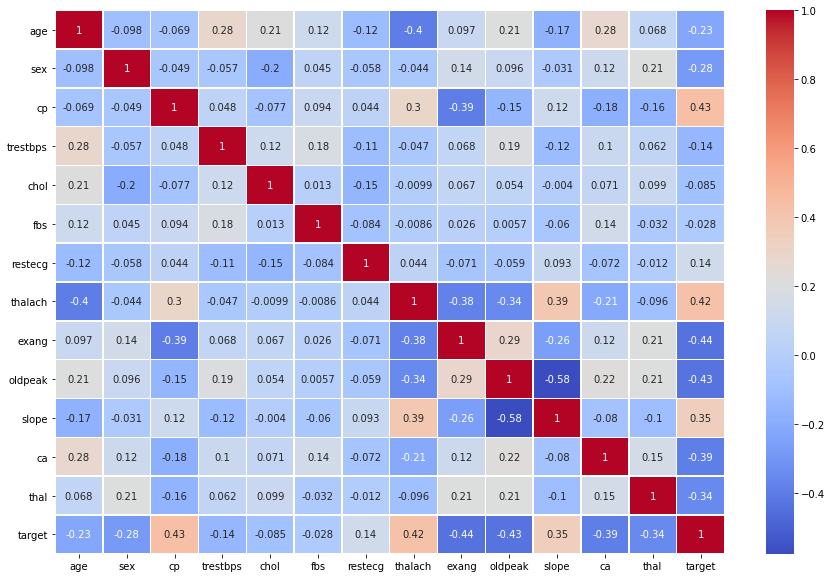

In [ ]:
f, ax = plt.subplots(figsize=(15, 10)) 
heatmap = sns.heatmap(correlation_matrix,linewidths = .5,cmap="coolwarm",annot=True)

### Exploratory Data Analysis (EDA)

#### First, analysing the target variable:

1    165
0    138
Name: target, dtype: int64


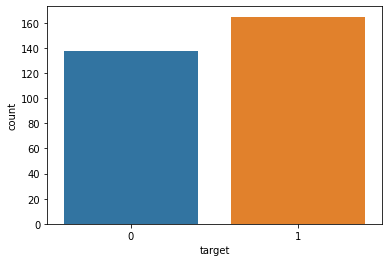

In [ ]:
y = dataset["target"]

sns.countplot(y)


target_temp = dataset.target.value_counts()

print(target_temp)

In [ ]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


#### Age Exploration

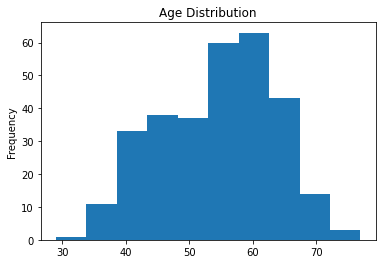

In [ ]:
dataset['age'].plot(kind = 'hist', title = 'Age Distribution')
plt.show()

In [ ]:
print('Min age: ', min(dataset['age']))
print('Max age: ', max(dataset['age']))
print('Average age: ', dataset['age'].mean())

Min age:  29
Max age:  77
Average age:  54.366336633663366


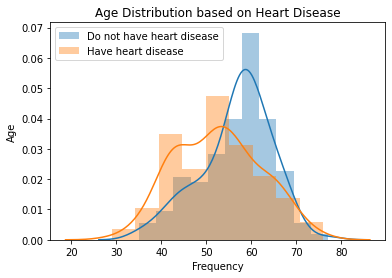

In [ ]:
# Display age distribution based on heart disease
sns.distplot(dataset[dataset['target'] == 0]['age'], label='Do not have heart disease')
sns.distplot(dataset[dataset['target'] == 1]['age'], label = 'Have heart disease')
plt.xlabel('Frequency')
plt.ylabel('Age')
plt.title('Age Distribution based on Heart Disease')
plt.legend()
plt.show()

In [ ]:
# Get min, max and average of the age of the people do not have heart diseas
print('Min age of people who do not have heart disease: ', min(dataset[dataset['target'] == 0]['age']))
print('Max age of people who do not have heart disease: ', max(dataset[dataset['target'] == 0]['age']))
print('Average age of people who do not have heart disease: ', dataset[dataset['target'] == 0]['age'].mean())

Min age of people who do not have heart disease:  35
Max age of people who do not have heart disease:  77
Average age of people who do not have heart disease:  56.60144927536232


In [ ]:
# Get min, max and average of the age of the people have heart diseas
print('Min age of people who have heart disease: ', min(dataset[dataset['target'] == 1]['age']))
print('Max age of people who have heart disease: ', max(dataset[dataset['target'] == 1]['age']))
print('Average age of people who have heart disease: ', dataset[dataset['target'] == 1]['age'].mean())

Min age of people who have heart disease:  29
Max age of people who have heart disease:  76
Average age of people who have heart disease:  52.4969696969697


##### From the data, I can say that the heart disease infects the old and young people, and the probability of the old people te be infected is higher than young people. 

#### Gender Exploration

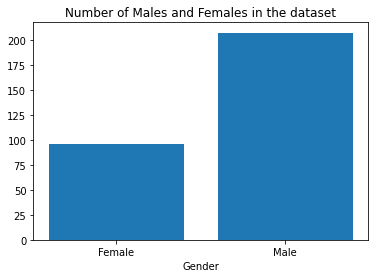

In [ ]:
# Number of males and females
F = dataset[dataset['sex'] == 0].count()['target']
M = dataset[dataset['sex'] == 1].count()['target']

# Create a plot
figure, ax = plt.subplots(figsize = (6, 4))
ax.bar(x = ['Female', 'Male'], height = [F, M])
plt.xlabel('Gender')
plt.title('Number of Males and Females in the dataset')
plt.show()

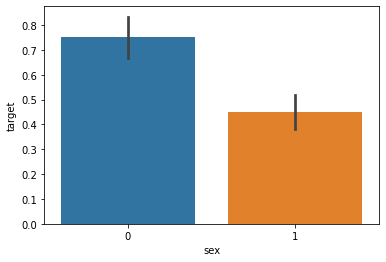

In [ ]:
sns.barplot(dataset["sex"],y)

##### We notice, that females are more likely to have heart problems than males

#### Chest Pain Type Exploration

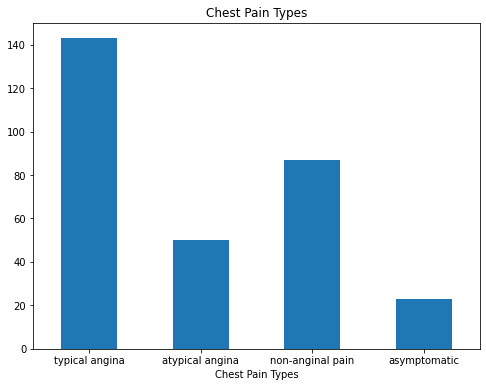

In [ ]:
# Display chest pain types in bar chart
dataset.groupby(dataset['cp']).count()['target'].plot(kind = 'bar', title = 'Chest Pain Types', figsize = (8, 6))
plt.xlabel('Chest Pain Types')
plt.xticks(np.arange(4), ('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'), rotation = 0)
plt.show()

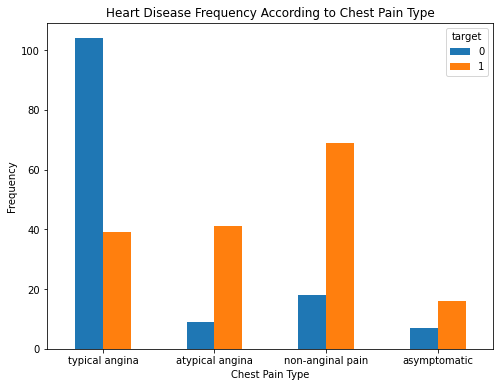

In [ ]:
# Display chest pain types based on the target
pd.crosstab(dataset.cp,dataset.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(np.arange(4), ('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

##### We can see that most of the people with heart disease have non-anginal chest pain. Also, the ones with typical angina chest pain are much less likely to have heart problems.

#### Blood Pressure Exploration 

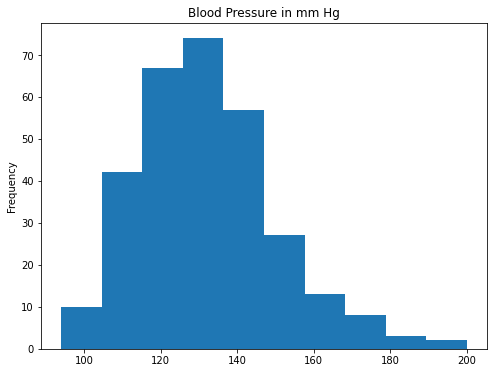

In [ ]:
# Display blood pressure distribution
dataset['trestbps'].plot(kind = 'hist', title = 'Blood Pressure in mm Hg', figsize = (8, 6))
plt.show()

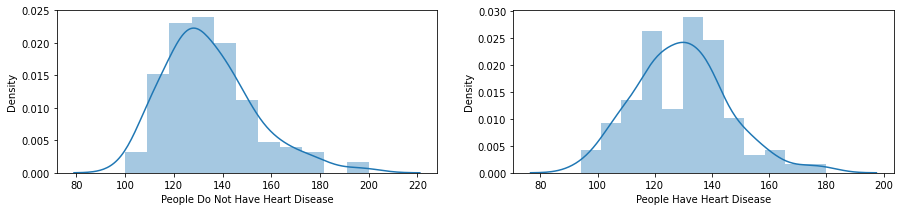

In [ ]:
# Display blood pressure distribution based on heart disease
fig, (axis1, axis2) = plt.subplots(1, 2,figsize=(15, 3))
ax = sns.distplot(dataset[dataset['target'] == 0]['trestbps'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel='People Do Not Have Heart Disease')
ax = sns.distplot(dataset[dataset['target'] == 1]['trestbps'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel='People Have Heart Disease')
plt.show()

In [ ]:
# Get min, max and average of the  blood pressure of the people do not have heart diseas
print('Min blood pressure of people who do not have heart disease: ', min(dataset[dataset['target'] == 0]['trestbps']))
print('Max blood pressure of people who do not have heart disease: ', max(dataset[dataset['target'] == 0]['trestbps']))
print('Average blood pressure of people who do not have heart disease: ', dataset[dataset['target'] == 0]['trestbps'].mean())

Min blood pressure of people who do not have heart disease:  100
Max blood pressure of people who do not have heart disease:  200
Average blood pressure of people who do not have heart disease:  134.3985507246377


In [ ]:
# Get min, max and average of the blood pressure of the people have heart diseas
print('Min blood pressure of people who have heart disease: ', min(dataset[dataset['target'] == 1]['trestbps']))
print('Max blood pressure of people who have heart disease: ', max(dataset[dataset['target'] == 1]['trestbps']))
print('Average blood pressure of people who have heart disease: ', dataset[dataset['target'] == 1]['trestbps'].mean())

Min blood pressure of people who have heart disease:  94
Max blood pressure of people who have heart disease:  180
Average blood pressure of people who have heart disease:  129.3030303030303


#### Cholestoral Exploration 

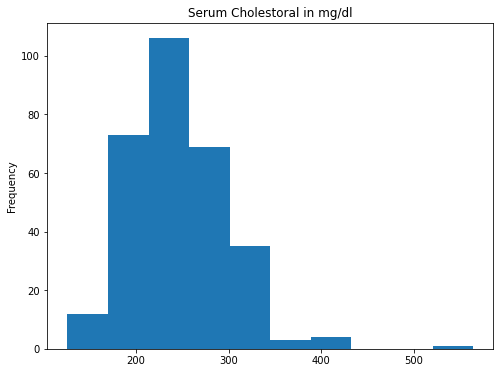

In [ ]:
# Display Cholestoral distribution
dataset['chol'].plot(kind = 'hist', title = 'Serum Cholestoral in mg/dl', figsize = (8, 6))
plt.show()

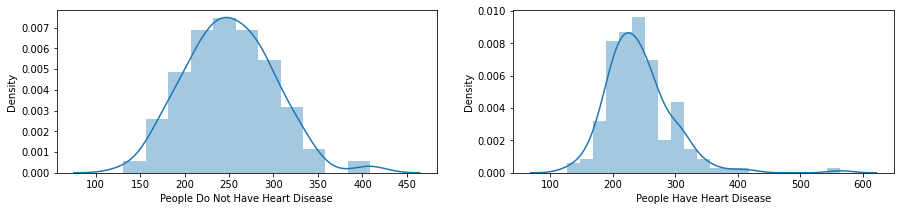

In [ ]:
# Display Cholestoral distribution based on heart disease
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(15, 3))
ax = sns.distplot(dataset[dataset['target'] == 0]['chol'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel='People Do Not Have Heart Disease')
ax = sns.distplot(dataset[dataset['target'] == 1]['chol'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel='People Have Heart Disease')
plt.show()

In [ ]:
# Get min, max and average of the Cholestoral of the people do not have heart diseas
print('Min cholestoral of people who do not have heart disease: ', min(dataset[dataset['target'] == 0]['chol']))
print('Max cholestoral of people who do not have heart disease: ', max(dataset[dataset['target'] == 0]['chol']))
print('Average cholestoral of people who do not have heart disease: ', dataset[dataset['target'] == 0]['chol'].mean())

Min cholestoral of people who do not have heart disease:  131
Max cholestoral of people who do not have heart disease:  409
Average cholestoral of people who do not have heart disease:  251.08695652173913


In [ ]:
# Get min, max and average of the Cholestoral of the people have heart diseas
print('Min cholestoral of people who have heart disease: ', min(dataset[dataset['target'] == 1]['chol']))
print('Max cholestoral of people who have heart disease: ', max(dataset[dataset['target'] == 1]['chol']))
print('Average cholestorale of people who have heart disease: ', dataset[dataset['target'] == 1]['chol'].mean())

Min cholestoral of people who have heart disease:  126
Max cholestoral of people who have heart disease:  564
Average cholestorale of people who have heart disease:  242.23030303030302


#### Fasting Blood Sugar  Exploration 

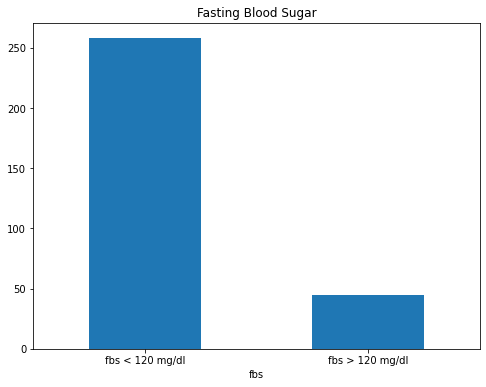

In [ ]:
# Display fasting blood sugar in bar chart
dataset.groupby(dataset['fbs']).count()['target'].plot(kind = 'bar', title = 'Fasting Blood Sugar', figsize = (8, 6))
plt.xticks(np.arange(2), ('fbs < 120 mg/dl', 'fbs > 120 mg/dl'), rotation = 0)
plt.show()

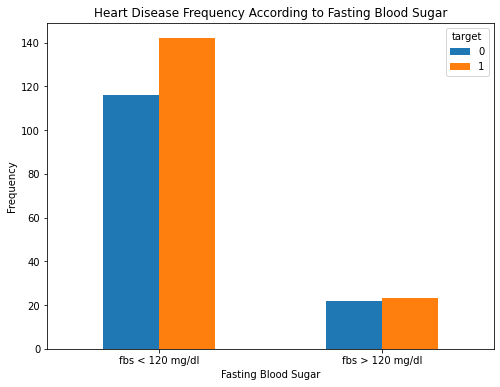

In [ ]:
# Display fasting blood sugar based on the target
pd.crosstab(dataset.fbs,dataset.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Fasting Blood Sugar')
plt.xlabel('Fasting Blood Sugar')
plt.xticks(np.arange(2), ('fbs < 120 mg/dl', 'fbs > 120 mg/dl'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

####  Electrocardiographic Results Exploration

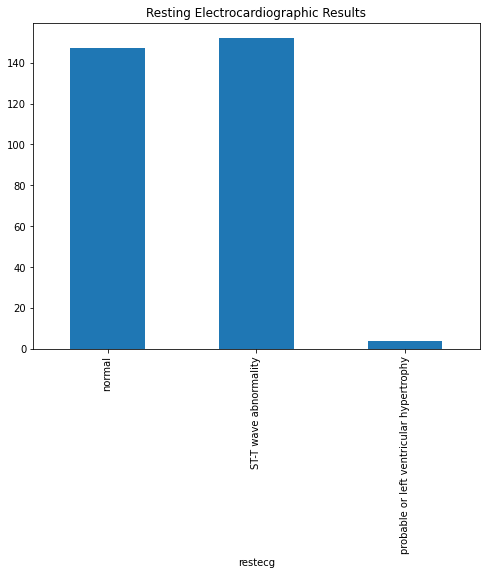

In [ ]:
# Display electrocardiographic results in bar chart
dataset.groupby(dataset['restecg']).count()['target'].plot(kind = 'bar', title = 'Resting Electrocardiographic Results', figsize = (8, 6))
plt.xticks(np.arange(3), ('normal', 'ST-T wave abnormality', 'probable or left ventricular hypertrophy'))
plt.show()

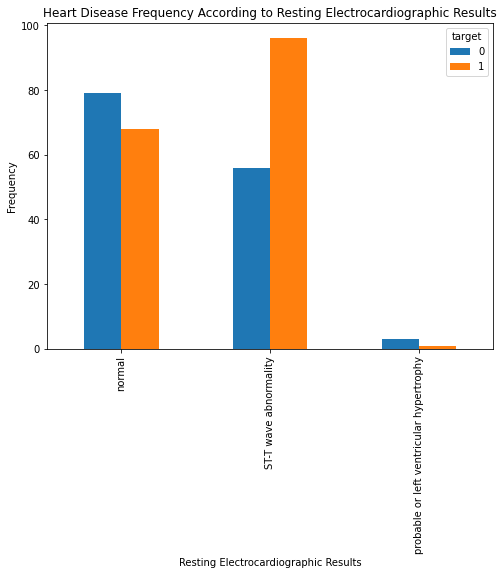

In [ ]:
# Display resting electrocardiographic results based on the target
pd.crosstab(dataset.restecg,dataset.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Resting Electrocardiographic Results')
plt.xticks(np.arange(3), ('normal', 'ST-T wave abnormality', 'probable or left ventricular hypertrophy'))
plt.xlabel('Resting Electrocardiographic Results')
plt.ylabel('Frequency')
plt.show()

##### Usually the people who do not have heart disease have normal electrocardiographic, whereas the people who have heart disease have ST-T wave abnormality.

#### Maximum Heart Rate Exploration

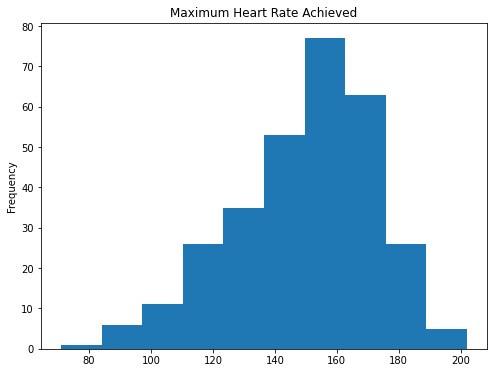

In [ ]:
# Display maximum heart rate distribution
dataset['thalach'].plot(kind = 'hist', title = 'Maximum Heart Rate Achieved', figsize = (8, 6))
plt.show()

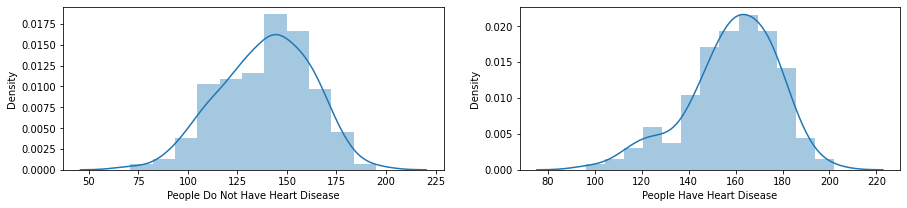

In [ ]:
# Display maximum heart rate distribution based on heart disease
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(15, 3))
ax = sns.distplot(dataset[dataset['target'] == 0]['thalach'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel = 'People Do Not Have Heart Disease')
ax = sns.distplot(dataset[dataset['target'] == 1]['thalach'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel = 'People Have Heart Disease')
plt.show()

In [ ]:
# Get min, max and average of the maximum heart rate of the people do not have heart diseas
print('Min resting blood pressure of people who do not have heart disease: ', min(dataset[dataset['target'] == 0]['thalach']))
print('Max resting blood pressure of people who do not have heart disease: ', max(dataset[dataset['target'] == 0]['thalach']))
print('Average resting blood pressure of people who do not have heart disease: ', dataset[dataset['target'] == 0]['thalach'].mean())

Min resting blood pressure of people who do not have heart disease:  71
Max resting blood pressure of people who do not have heart disease:  195
Average resting blood pressure of people who do not have heart disease:  139.1014492753623


In [ ]:
# Get min, max and average of the maximum heart rate of the people have heart diseas
print('Min maximum heart rate  of people who have heart disease: ', min(dataset[dataset['target'] == 1]['thalach']))
print('Max maximum heart rate people who have heart disease: ', max(dataset[dataset['target'] == 1]['thalach']))
print('Average maximum heart rate of people who have heart disease: ', dataset[dataset['target'] == 1]['thalach'].mean())

Min maximum heart rate  of people who have heart disease:  96
Max maximum heart rate people who have heart disease:  202
Average maximum heart rate of people who have heart disease:  158.46666666666667


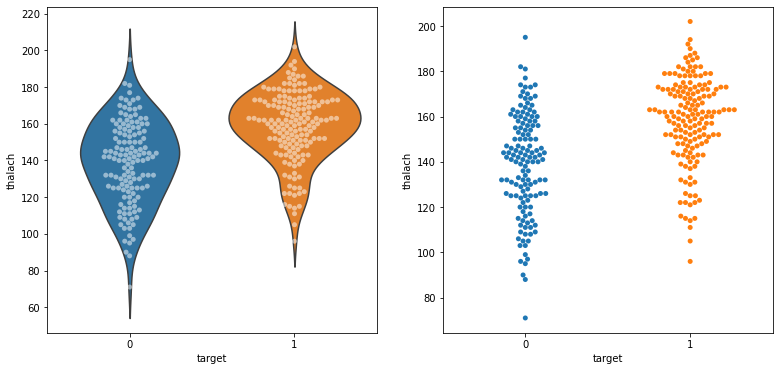

In [ ]:
plt.figure(figsize=(13,6))
plt.subplot(121)
sns.violinplot(x="target", y="thalach", data=dataset, inner=None)
sns.swarmplot(x="target", y="thalach", data=dataset, color='w', alpha=0.5)


plt.subplot(122)
sns.swarmplot(x="target", y="thalach", data=dataset)
plt.show()

#### Exercise Induced Angina Exploration

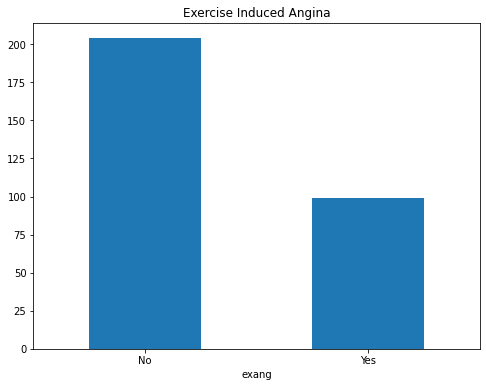

In [ ]:
# Display exercise induced angina in bar chart
dataset.groupby(dataset['exang']).count()['target'].plot(kind = 'bar', title = 'Exercise Induced Angina',  figsize = (8, 6))
plt.xticks(np.arange(2), ('No', 'Yes'), rotation = 0)
plt.show()

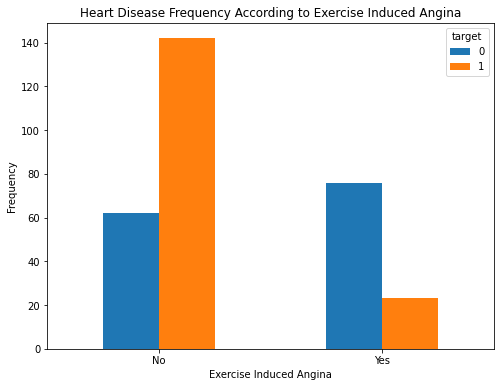

In [ ]:
# Display exercise induced angina based on the target
pd.crosstab(dataset.exang,dataset.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Exercise Induced Angina')
plt.xlabel('Exercise Induced Angina')
plt.xticks(np.arange(2), ('No', 'Yes'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

#### ST depression Exploration

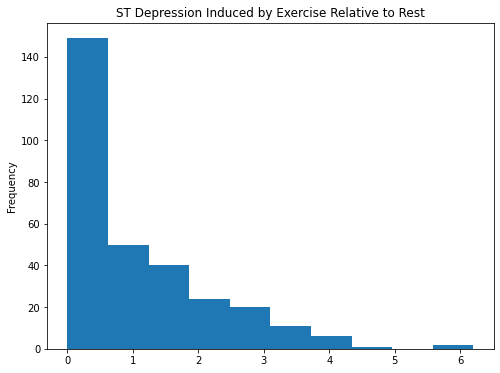

In [ ]:
# Display ST depression induced by exercise relative to rest distribution
dataset['oldpeak'].plot(kind = 'hist', title = 'ST Depression Induced by Exercise Relative to Rest', figsize = (8, 6))
plt.show()

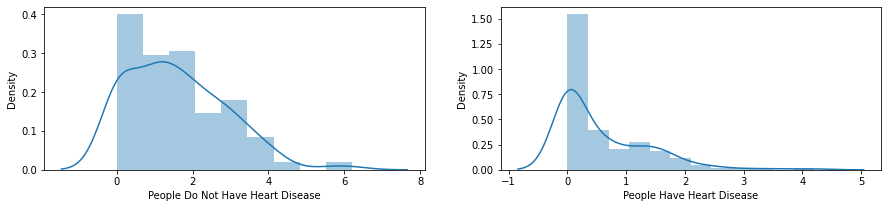

In [ ]:
# Display ST depression distribution based on heart disease
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(15, 3))
ax = sns.distplot(dataset[dataset['target'] == 0]['oldpeak'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel = 'People Do Not Have Heart Disease')
ax = sns.distplot(dataset[dataset['target'] == 1]['oldpeak'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel = 'People Have Heart Disease')
plt.show()

In [ ]:
# Get min, max and average of the ST depression  of the people do not have heart diseas
print('Min ST depression of people who do not have heart disease: ', min(dataset[dataset['target'] == 0]['oldpeak']))
print('Max ST depression of people who do not have heart disease: ', max(dataset[dataset['target'] == 0]['oldpeak']))
print('Average ST depression of people who do not have heart disease: ', dataset[dataset['target'] == 0]['oldpeak'].mean())

Min ST depression of people who do not have heart disease:  0.0
Max ST depression of people who do not have heart disease:  6.2
Average ST depression of people who do not have heart disease:  1.5855072463768118


In [ ]:
# Get min, max and average of the ST depression of the people have heart diseas
print('Min ST depression of people who have heart disease: ', min(dataset[dataset['target'] == 1]['oldpeak']))
print('Max ST depression of people who have heart disease: ', max(dataset[dataset['target'] == 1]['oldpeak']))
print('Average ST depression of people not have heart disease: ', dataset[dataset['target'] == 1]['oldpeak'].mean())

Min ST depression of people who have heart disease:  0.0
Max ST depression of people who have heart disease:  4.2
Average ST depression of people not have heart disease:  0.5830303030303029


#### Slope Exploration

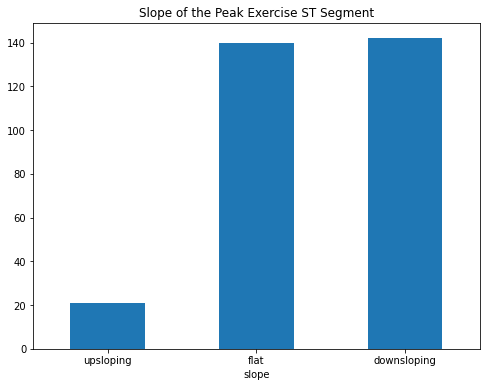

In [ ]:
# Display slope of the peak exercise ST segment in bar chart
dataset.groupby(dataset['slope']).count()['target'].plot(kind = 'bar', title = 'Slope of the Peak Exercise ST Segment', figsize = (8, 6))
plt.xticks(np.arange(3), ('upsloping', 'flat', 'downsloping'), rotation = 0)
plt.show()

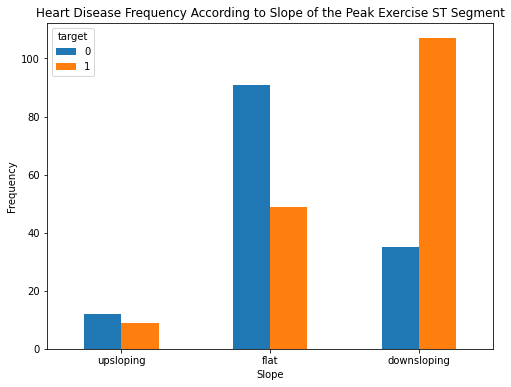

In [ ]:
# Display slope of the peak exercise ST segment based on the target
pd.crosstab(dataset.slope,dataset.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Slope of the Peak Exercise ST Segment')
plt.xlabel('Slope')
plt.xticks(np.arange(3), ('upsloping', 'flat', 'downsloping'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

#### Major Vessels Exploration

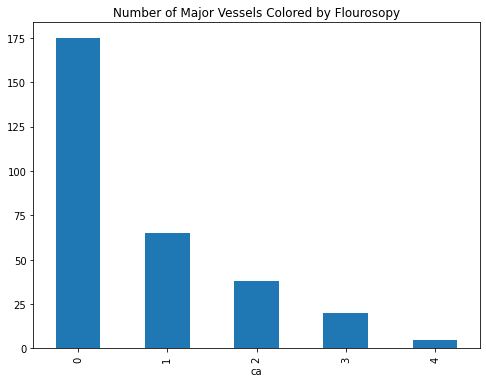

In [ ]:
# Display number of major vessels in bar chart
dataset.groupby(dataset['ca']).count()['target'].plot(kind = 'bar', title = 'Number of Major Vessels Colored by Flourosopy', 
                                            figsize = (8, 6))
plt.show()

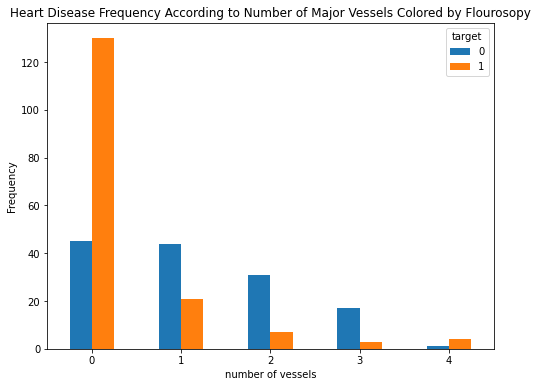

In [ ]:
# Display number of vessels based on the target
pd.crosstab(dataset.ca,dataset.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Number of Major Vessels Colored by Flourosopy')
plt.xlabel('number of vessels')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

#### Thalassemia Exploration

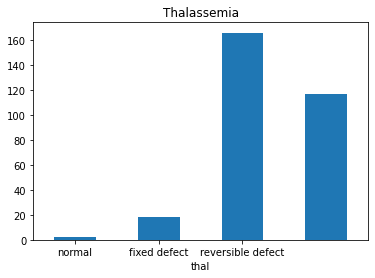

In [ ]:
# Display thalassemia in bar chart
dataset.groupby(dataset['thal']).count()['target'].plot(kind = 'bar', title = 'Thalassemia')
plt.xticks(np.arange(3), ('normal', 'fixed defect', 'reversible defect'), rotation = 0)
plt.show()

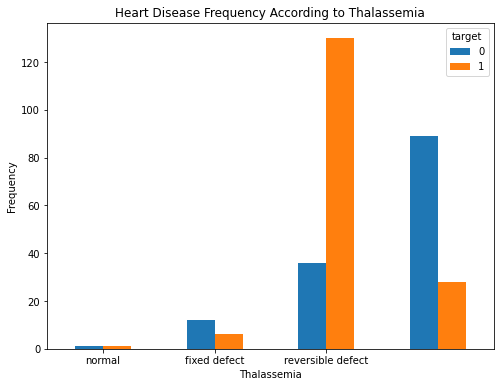

In [ ]:
pd.crosstab(dataset.thal,dataset.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Thalassemia')
plt.xlabel('Thalassemia')
plt.xticks(np.arange(3), ('normal', 'fixed defect', 'reversible defect'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

#### The correlation between heart disease, cp and exang

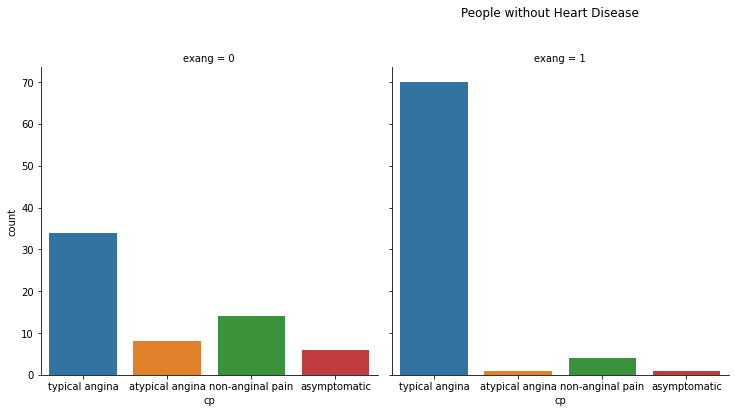

In [ ]:
g = sns.factorplot("cp", col = "exang", col_wrap = 3, data = dataset[dataset['target'] == 0], kind = "count")
plt.xticks(np.arange(4), ('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'), rotation = 0)
g.fig.suptitle('People without Heart Disease', y = 1.1)
plt.show()

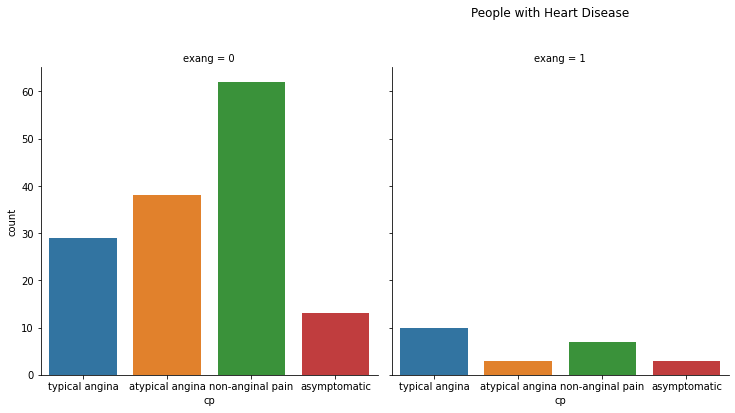

In [ ]:
g = sns.factorplot("cp", col = "exang", col_wrap = 3, data = dataset[dataset['target'] == 1], kind = "count")
plt.xticks(np.arange(4), ('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'), rotation = 0)
g.fig.suptitle('People with Heart Disease', y = 1.1)
plt.show()

#### The correlation between oldpeak, slope and target

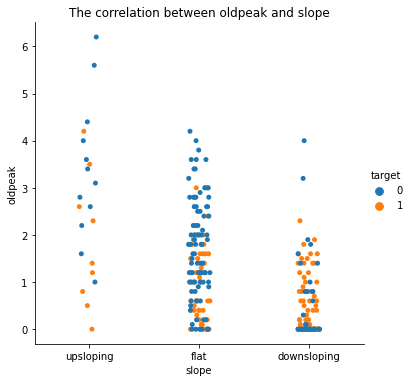

In [ ]:
sns.catplot(x = "slope", y = "oldpeak", hue = "target", data = dataset)
plt.title('The correlation between oldpeak and slope')
plt.xticks(np.arange(3), ('upsloping', 'flat', 'downsloping'), rotation = 0)
plt.show()

#### The correlation between ca and age

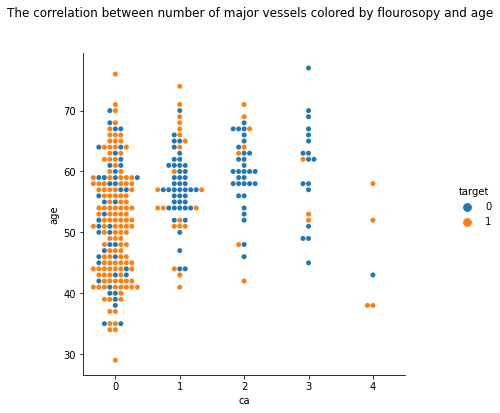

In [ ]:
g = sns.catplot(x = 'ca', y = 'age', hue = 'target', data = dataset, kind="swarm")
g.fig.suptitle('The correlation between number of major vessels colored by flourosopy and age', y = 1.1)
plt.show()

#### The correlation between age and thalach

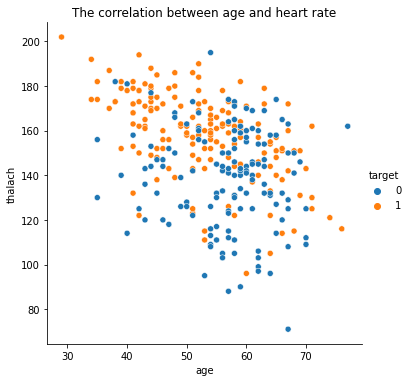

In [ ]:
sns.relplot(x = 'age', y = 'thalach', data = dataset, hue = 'target', legend="full")
plt.title('The correlation between age and heart rate')
plt.show()

### Train Test split

In [ ]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [ ]:
X_train.shape

(242, 13)

In [ ]:
X_test.shape

(61, 13)

In [ ]:
Y_train.shape

(242,)

In [ ]:
Y_test.shape

(61,)

### Model Fitting

In [ ]:
from sklearn.metrics import accuracy_score

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [ ]:
Y_pred_lr.shape

(61,)

In [ ]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
def print_heatmap(matrix, score, figsize=(9, 9)):
    plt.figure(figsize=figsize)
    sns.heatmap(matrix, annot=True,cmap='Blues_r')
    plt.xlabel('Prediction')
    plt.ylabel('Actual')
    plt.title("Logistic Regression \n Accuracy Score: {0}".format(score_lr), size=12)

In [ ]:
cm = confusion_matrix(Y_test,Y_pred_lr)
cm

array([[22,  5],
       [ 4, 30]])

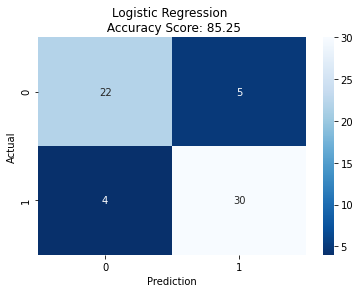

In [ ]:
print_heatmap(cm, score_lr, figsize=(6,4))

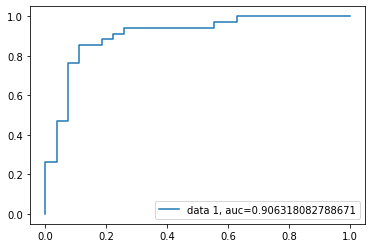

In [ ]:
from sklearn import metrics
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [ ]:
Y_pred_nb.shape

(61,)

In [ ]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Gaussian Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Gaussian Naive Bayes is: 85.25 %


In [ ]:
def print_heatmap(matrix, score, figsize=(9, 9)):
    plt.figure(figsize=figsize)
    sns.heatmap(matrix, annot=True,cmap='Blues_r')
    plt.xlabel('Prediction')
    plt.ylabel('Actual')
    plt.title("Gaussian Naive Bayes \nAccuracy Score: {0}".format(score_nb), size=12)

In [ ]:
cm = confusion_matrix(Y_test,Y_pred_nb)
cm

array([[21,  6],
       [ 3, 31]])

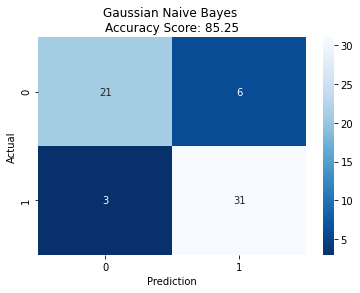

In [ ]:
print_heatmap(cm, score_nb, figsize=(6,4))

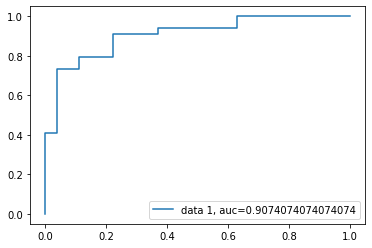

In [ ]:
from sklearn import metrics
y_pred_proba = nb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()

mnb.fit(X_train, Y_train)

Y_pred_mnb = mnb.predict(X_test)

In [ ]:
Y_pred_mnb.shape

(61,)

In [ ]:
score_mnb = round(accuracy_score(Y_pred_mnb,Y_test)*100,2)

print("The accuracy score achieved using Multinomial Naive Bayes is: "+str(score_mnb)+" %")

The accuracy score achieved using Multinomial Naive Bayes is: 77.05 %


In [ ]:
def print_heatmap(matrix, score, figsize=(9, 9)):
    plt.figure(figsize=figsize)
    sns.heatmap(matrix, annot=True,cmap='Blues_r')
    plt.xlabel('Prediction')
    plt.ylabel('Actual')
    plt.title("Multinomial Naive Bayes \nAccuracy Score: {0}".format(score_mnb), size=12)

In [ ]:
cm = confusion_matrix(Y_test,Y_pred_mnb)
cm

array([[19,  8],
       [ 6, 28]])

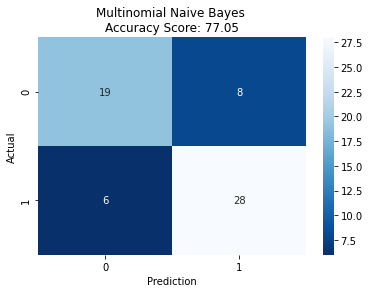

In [ ]:
print_heatmap(cm, score_mnb, figsize=(6,4))

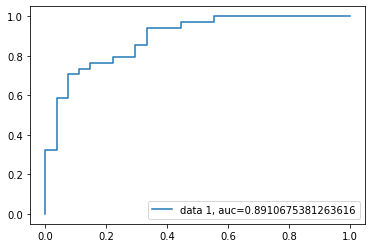

In [ ]:
from sklearn import metrics
y_pred_proba = mnb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Linear SVM

In [ ]:
from sklearn import svm

sv = svm.SVC(kernel='linear', probability=True)

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [ ]:
Y_pred_svm.shape

(61,)

In [ ]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 81.97 %


In [ ]:
def print_heatmap(matrix, score, figsize=(9, 9)):
    plt.figure(figsize=figsize)
    sns.heatmap(matrix, annot=True,cmap='Blues_r')
    plt.xlabel('Prediction')
    plt.ylabel('Actual')
    plt.title("Linear SVM \nAccuracy Score: {0}".format(score_svm), size=12)

In [ ]:
cm = confusion_matrix(Y_test,Y_pred_svm)
cm

array([[20,  7],
       [ 4, 30]])

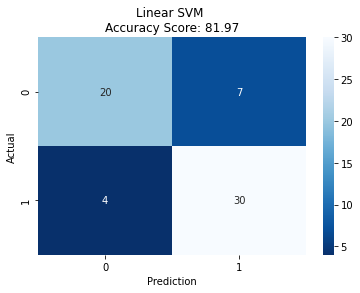

In [ ]:
print_heatmap(cm, score_svm, figsize=(6,4))

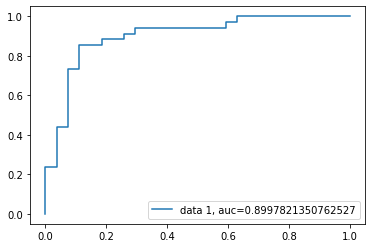

In [ ]:
from sklearn import metrics
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
y_pred_proba = sv.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### K Nearest Neighbors

Minimum error:- 0.22950819672131148 at K = 38


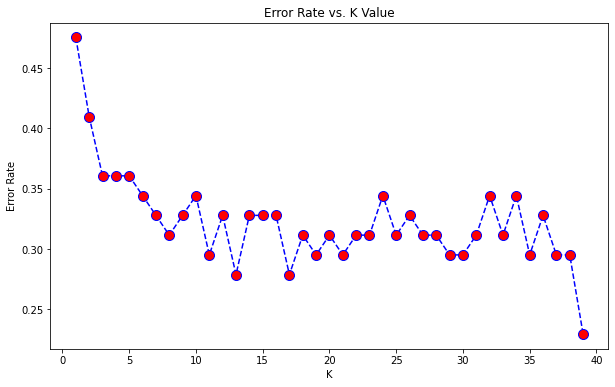

In [ ]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,Y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != Y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.7704918032786885 at K = 38


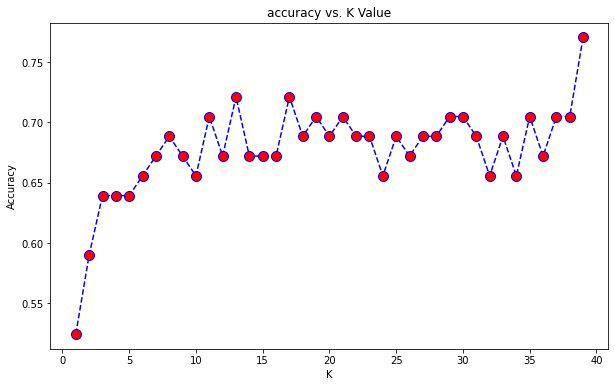

In [ ]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,Y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(Y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=38)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [ ]:
Y_pred_knn.shape

(61,)

In [ ]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 70.49 %


In [ ]:
def print_heatmap(matrix, score, figsize=(9, 9)):
    plt.figure(figsize=figsize)
    sns.heatmap(matrix, annot=True,cmap='Blues_r')
    plt.xlabel('Prediction')
    plt.ylabel('Actual')
    plt.title("KNN \nAccuracy Score: {0}".format(score_knn), size=12)

In [ ]:
cm = confusion_matrix(Y_test,Y_pred_knn)
cm

array([[18,  9],
       [ 9, 25]])

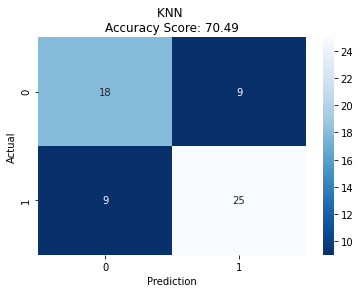

In [ ]:
print_heatmap(cm, score_knn, figsize=(6,4))

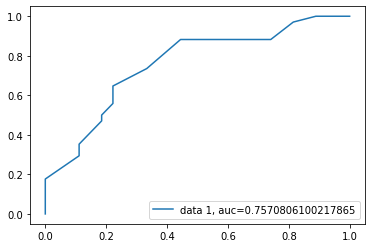

In [ ]:
from sklearn import metrics
y_pred_proba = knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

11


In [ ]:
print(Y_pred_dt.shape)

(61,)


In [ ]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 81.97 %


In [ ]:
def print_heatmap(matrix, score, figsize=(9, 9)):
    plt.figure(figsize=figsize)
    sns.heatmap(matrix, annot=True,cmap='Blues_r')
    plt.xlabel('Prediction')
    plt.ylabel('Actual')
    plt.title("Decision Tree \nAccuracy Score: {0}".format(score_dt), size=12)

In [ ]:
cm = confusion_matrix(Y_test,Y_pred_dt)
cm

array([[22,  5],
       [ 6, 28]])

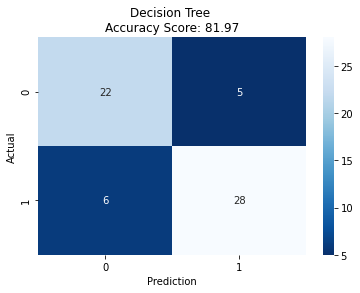

In [ ]:
print_heatmap(cm, score_dt, figsize=(6, 4))

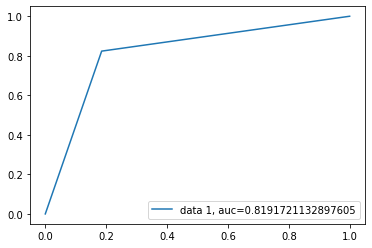

In [ ]:
from sklearn import metrics
y_pred_proba = dt.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

323


In [ ]:
Y_pred_rf.shape

(61,)

In [ ]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forest is: 90.16 %


In [ ]:
def print_heatmap(matrix, score, figsize=(9, 9)):
    plt.figure(figsize=figsize)
    sns.heatmap(matrix, annot=True,cmap='Blues_r')
    plt.xlabel('Prediction')
    plt.ylabel('Actual')
    plt.title("Random Forest \nAccuracy Score: {0}".format(score_rf), size=12)

In [ ]:
cm = confusion_matrix(Y_test,Y_pred_rf)
cm

array([[23,  4],
       [ 2, 32]])

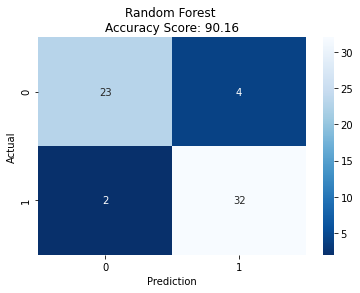

In [ ]:
print_heatmap(cm, score_rf, figsize=(6,4))

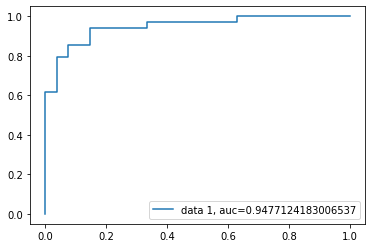

In [ ]:
from sklearn import metrics
y_pred_proba = rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### XGBoost

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
Y_pred_xgb.shape

(61,)

In [ ]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 85.25 %


In [ ]:
def print_heatmap(matrix, score, figsize=(9, 9)):
    plt.figure(figsize=figsize)
    sns.heatmap(matrix, annot=True,cmap='Blues_r')
    plt.xlabel('Prediction')
    plt.ylabel('Actual')
    plt.title("XGBoost \nAccuracy Score: {0}".format(score_xgb), size=12)

In [ ]:
cm = confusion_matrix(Y_test,Y_pred_xgb)
cm

array([[22,  5],
       [ 4, 30]])

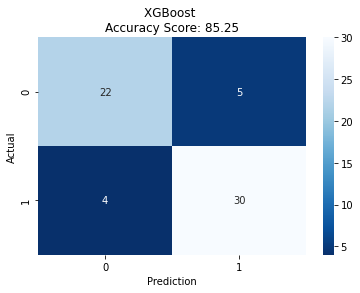

In [ ]:
print_heatmap(cm, score_nb, figsize=(6,4))

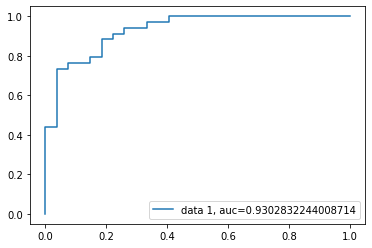

In [ ]:
from sklearn import metrics
y_pred_proba = xgb_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(X_train,Y_train,epochs=300)

Epoch 1/300
8/8 [==============================] - 1s 2ms/step - loss: 89.9386 - accuracy: 0.4587
Epoch 2/300
8/8 [==============================] - 0s 2ms/step - loss: 80.3662 - accuracy: 0.4587
Epoch 3/300
8/8 [==============================] - 0s 2ms/step - loss: 70.4216 - accuracy: 0.4587
Epoch 4/300
8/8 [==============================] - 0s 4ms/step - loss: 59.9215 - accuracy: 0.4587
Epoch 5/300
8/8 [==============================] - 0s 2ms/step - loss: 49.1128 - accuracy: 0.4587
Epoch 6/300
8/8 [==============================] - 0s 2ms/step - loss: 37.9573 - accuracy: 0.4587
Epoch 7/300
8/8 [==============================] - 0s 2ms/step - loss: 26.2995 - accuracy: 0.4587
Epoch 8/300
8/8 [==============================] - 0s 2ms/step - loss: 13.9667 - accuracy: 0.4711
Epoch 9/300
8/8 [==============================] - 0s 2ms/step - loss: 4.8128 - accuracy: 0.5702
Epoch 10/300
8/8 [==============================] - 0s 2ms/step - loss: 4.1280 - accuracy: 0.6116
Epoch 11/300
8/8 [===

In [ ]:
Y_pred_nn = model.predict(X_test)

In [ ]:
Y_pred_nn.shape

(61, 1)

In [ ]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [ ]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

The accuracy score achieved using Neural Network is: 86.89 %


In [ ]:
def print_heatmap(matrix, score, figsize=(9, 9)):
    plt.figure(figsize=figsize)
    sns.heatmap(matrix, annot=True,cmap='Blues_r')
    plt.xlabel('Prediction')
    plt.ylabel('Actual')
    plt.title("Neural Network \nAccuracy Score: {0}".format(score_nn), size=12)

In [ ]:
cm = confusion_matrix(Y_test,Y_pred_nn)
cm

array([[23,  4],
       [ 4, 30]])

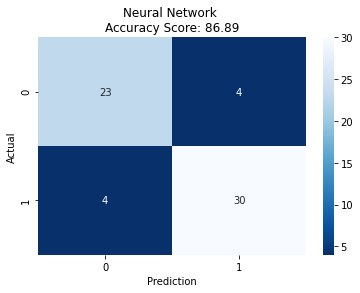

In [ ]:
print_heatmap(cm, score_nn, figsize=(6, 4))

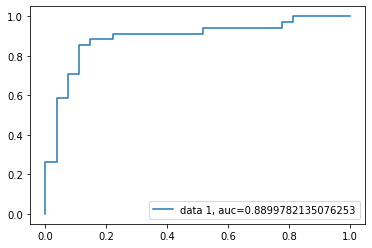

In [ ]:
from sklearn.metrics import roc_curve
Y_pred_keras = model.predict(X_test).ravel()
fpr, tpr, thresholds_keras = roc_curve(Y_test, Y_pred_keras)
auc = metrics.roc_auc_score(Y_test, Y_pred_keras)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### LightGBM

In [ ]:
import lightgbm as lgb

d_train = lgb.Dataset(X_train, label = Y_train)
params = {}

clf = lgb.train(params, d_train, 100)
#Prediction
Y_pred_lgbm = clf.predict(X_test)
#convert into binary values
for i in range(0, len(Y_pred_lgbm)):
    if Y_pred_lgbm[i]>= 0.5:       # setting threshold to .5
       Y_pred_lgbm[i]=1
    else:  
       Y_pred_lgbm[i]=0

In [ ]:
Y_pred_lgbm.shape

(61,)

In [ ]:
cm = confusion_matrix(Y_test, Y_pred_lgbm)
cm

array([[21,  6],
       [ 6, 28]])

In [ ]:
score_lgbm = round(((cm[0][0] + cm[1][1])/len(Y_test))*100,2)
print("The accuracy score achieved using LightGBM is: "+str(score_lgbm)+" %")

The accuracy score achieved using LightGBM is: 80.33 %


In [ ]:
def print_heatmap(matrix, score, figsize=(9, 9)):
    plt.figure(figsize=figsize)
    sns.heatmap(matrix, annot=True,cmap='Blues_r')
    plt.xlabel('Prediction')
    plt.ylabel('Actual')
    plt.title("LightGBM \nAccuracy Score: {0}".format(score_lgbm), size=12)

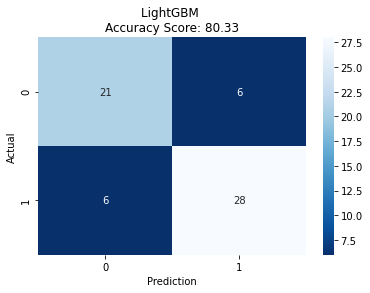

In [ ]:
print_heatmap(cm, score_lgbm, figsize=(6,4))

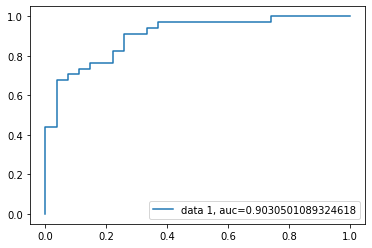

In [ ]:
from sklearn import metrics
Y_pred_lgbm = clf.predict(X_test).ravel()
fpr, tpr, _ = roc_curve(Y_test, Y_pred_lgbm)
auc = metrics.roc_auc_score(Y_test, Y_pred_lgbm)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
ab = AdaBoostClassifier(learning_rate=0.01,n_estimators=1)
model = ab.fit(X_train,Y_train)
Y_pred_ab = model.predict(X_test)

In [ ]:
Y_pred_ab.shape

(61,)

In [ ]:
score_ab = round(metrics.accuracy_score(Y_test, Y_pred_ab)*100,2)
print("The accuracy score achieved using AdaBoost is: "+str(score_ab)+" %")

The accuracy score achieved using AdaBoost is: 78.69 %


In [ ]:
cm = confusion_matrix(Y_test,Y_pred_ab)
cm

array([[20,  7],
       [ 6, 28]])

In [ ]:
def print_heatmap(matrix, score, figsize=(9, 9)):
    plt.figure(figsize=figsize)
    sns.heatmap(matrix, annot=True,cmap='Blues_r')
    plt.xlabel('Prediction')
    plt.ylabel('Actual')
    plt.title("AdaBoost \nAccuracy Score: {0}".format(score_ab), size=12)

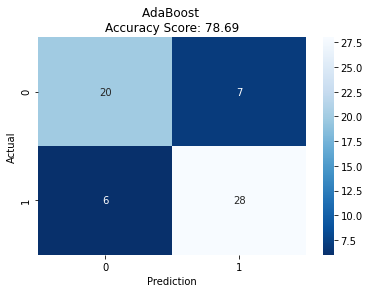

In [ ]:
print_heatmap(cm, score_ab, figsize=(6,4))

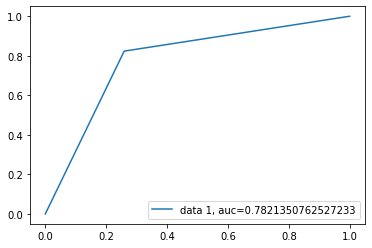

In [ ]:
from sklearn import metrics
y_pred_proba = ab.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Output final score

In [ ]:
scores = [score_lr,score_nb,score_mnb,score_svm,score_knn,score_dt,score_rf,score_xgb,score_nn,score_lgbm,score_ab]
algorithms = ["Logistic Regression","Gaussian Naive Bayes","Multinomial Naive Bayes","Linear Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost","Neural Network","LightGBM","AdaBoost"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Gaussian Naive Bayes is: 85.25 %
The accuracy score achieved using Multinomial Naive Bayes is: 77.05 %
The accuracy score achieved using Linear Support Vector Machine is: 81.97 %
The accuracy score achieved using K-Nearest Neighbors is: 70.49 %
The accuracy score achieved using Decision Tree is: 81.97 %
The accuracy score achieved using Random Forest is: 90.16 %
The accuracy score achieved using XGBoost is: 85.25 %
The accuracy score achieved using Neural Network is: 86.89 %
The accuracy score achieved using LightGBM is: 80.33 %
The accuracy score achieved using AdaBoost is: 78.69 %


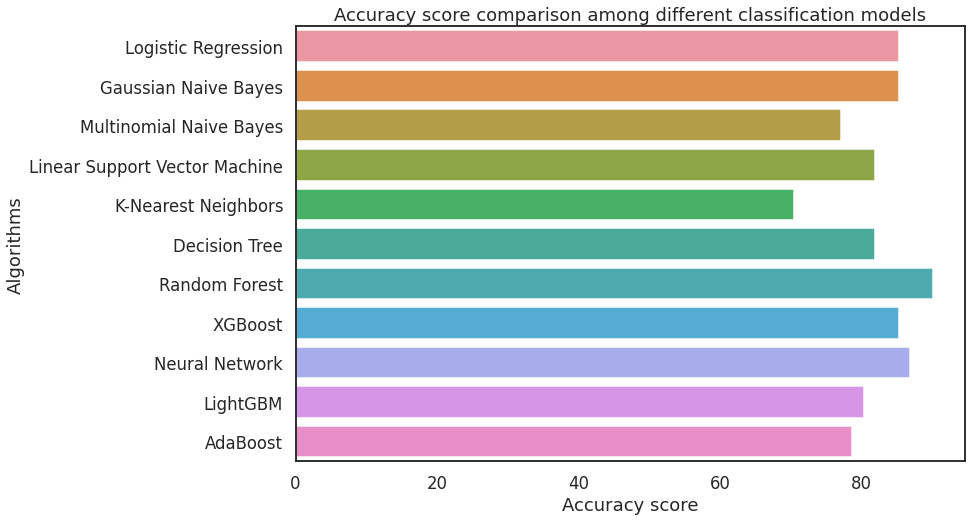

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style("white")

sns.set_context("talk")
plt.xlabel("Accuracy score")
plt.ylabel("Algorithms")
plt.title('Accuracy score comparison among different classification models')

sns.barplot(scores,algorithms,orient='h')

##### In this project, I have used Machine Learning to predict whether a person is suffering from a heart disease or not. After importing the data, I have analysed it using plots. Then, generated categorical features and scaled other features. Then applied eleven Machine Learning algorithms. In the end, Random Forest achieved the highest score of 90.16%.